In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df_ML_company = pd.read_csv('C:/Users/David/OneDrive/Desktop/Corso_FITSTIC/GitHub/FISTIC2024/Miei_File/Company.csv', keep_default_na=False, na_values=['', ' ']) #importo il csv
df_ML_company_clone=df_ML_company
df_ML_company_clone

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [17]:
df_ML_company_clone.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [18]:
df_company_cov=df_ML_company_clone.cov()
df_company_cov

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,408.828044
Radio,69.862492,220.427743,114.496979,27.428189
Newspaper,105.919452,114.496979,474.308326,18.177390
Sales,408.828044,27.428189,18.177390,27.919517


In [19]:
df_company_cor=df_ML_company_clone.corr()
df_company_cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


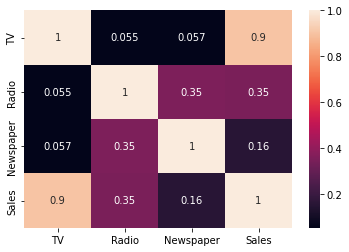

In [20]:
heatmap=sns.heatmap(df_company_cor,annot=True)

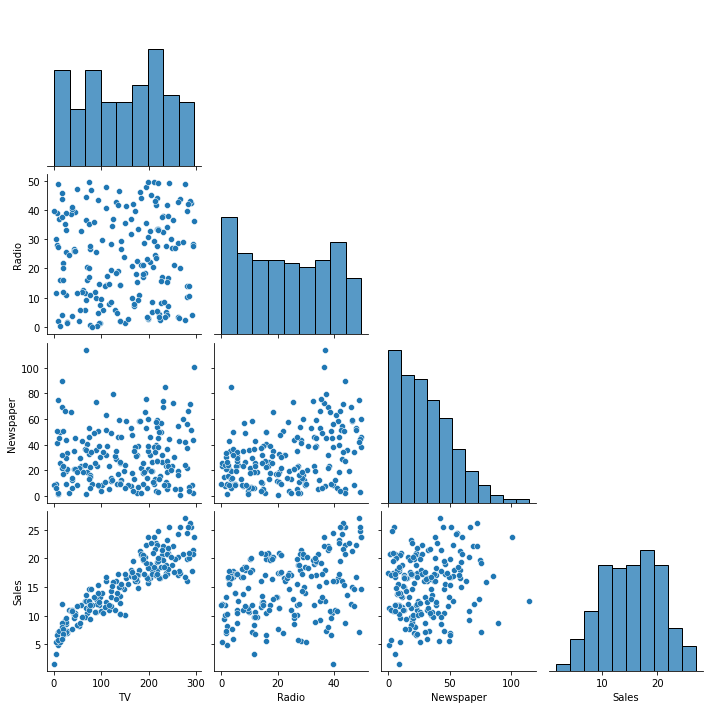

In [33]:
Plot=sns.pairplot(df_ML_company_clone, corner= True)

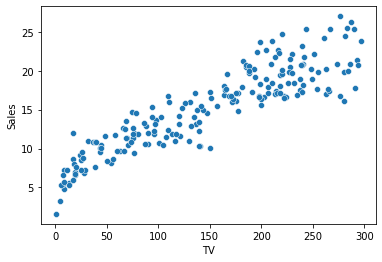

In [22]:
scatter1=sns.scatterplot(df_ML_company_clone, x='TV', y='Sales') #Lo scatter migliore

In [30]:
X = df_ML_company_clone.drop(columns=['Sales'])
y = df_ML_company_clone['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modello1 = LinearRegression()
modello1.fit(X_train, y_train)
B0= modello1.intercept_
B1,B2,B3= modello1.coef_
print(B0,B1,B2,B3)

4.714126402214127 0.05450927083721978 0.10094536239295579 0.0043366468220340446


In [23]:
X = df_ML_company_clone.drop(columns=['Sales'])
y = df_ML_company_clone['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modello1 = LinearRegression()
modello1.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = modello1.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

MSE: 2.9077569102710896
R²: 0.9059011844150826


In [25]:
X = df_ML_company_clone[['TV']]
y = df_ML_company_clone['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modello = LinearRegression()
modello.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = modello.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

MSE: 6.101072906773963
R²: 0.802561303423698


In [29]:
df_ML_company.to_excel('Company.xlsx')